In [1]:
library(ggplot2)
library("dplyr")
library(viridis)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: viridisLite


# Cellpose data

In [69]:
path2 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/cellpose_cell_metadata.csv'
metadata1 = read.csv(path2, row.names = 1)

location = metadata1[,c('center_x','center_y')]
location1 = as.matrix(location)

idx1 = read.csv("data/cellidx_LH.csv")[,1]

location1 = location1[idx1,]

In [72]:
load("modelssaved/three_sample_f20_s5K_l300_norm_i1000.RData")
# load("modelssaved/three_sample_f20_nmfgen_iter1000.RData")

In [73]:
# load data for celltype plot
total = nrow(metadata1)
celltype = rep("none",total)
cell_annotation = read.csv('data/celltype_LH.csv')

celltype[cell_annotation[,1] + 1] = as.character(cell_annotation[,2])

celltype = celltype[idx1]

In [77]:
# norm_exp = out$exposures[1:sum(idx1),]/rowSums(out$exposures[1:sum(idx1),])
norm_exp = out$exposures[1:sum(idx1),]
cluster = apply(norm_exp,1,which.max)
topic = 6

dat = data.frame(celltype = celltype, loc = location1, prob = norm_exp[,topic], clustertopic = cluster == topic)

dat$loc.center_y = -dat$loc.center_y 


In [78]:
idx_sub1 = which( dat$loc.center_x > 52000 & dat$loc.center_x < 70000  &  dat$loc.center_y > -57500 & dat$loc.center_y < -50000)
idx_sub2 = which( dat$loc.center_x > 104000 & dat$loc.center_x < 131000  &  dat$loc.center_y > -50000 & dat$loc.center_y < -25000)
idx_sub3 = which( dat$loc.center_x > 0 & dat$loc.center_x < 20000  &  dat$loc.center_y > -40000 & dat$loc.center_y < -20000)
idx_sub4 = which( dat$loc.center_x > 114000 & dat$loc.center_x < 120000  &  dat$loc.center_y > -45000 & dat$loc.center_y < -36000)
idx_sub5 = which( dat$loc.center_x > 102000 & dat$loc.center_x < 112000  &  dat$loc.center_y > -32000 & dat$loc.center_y < -26000)
idx_sub6 = which( dat$loc.center_x > 125000 & dat$loc.center_x < 135000  &  dat$loc.center_y > -35000 & dat$loc.center_y < -20000)
plotdat = dat[idx_sub1,]

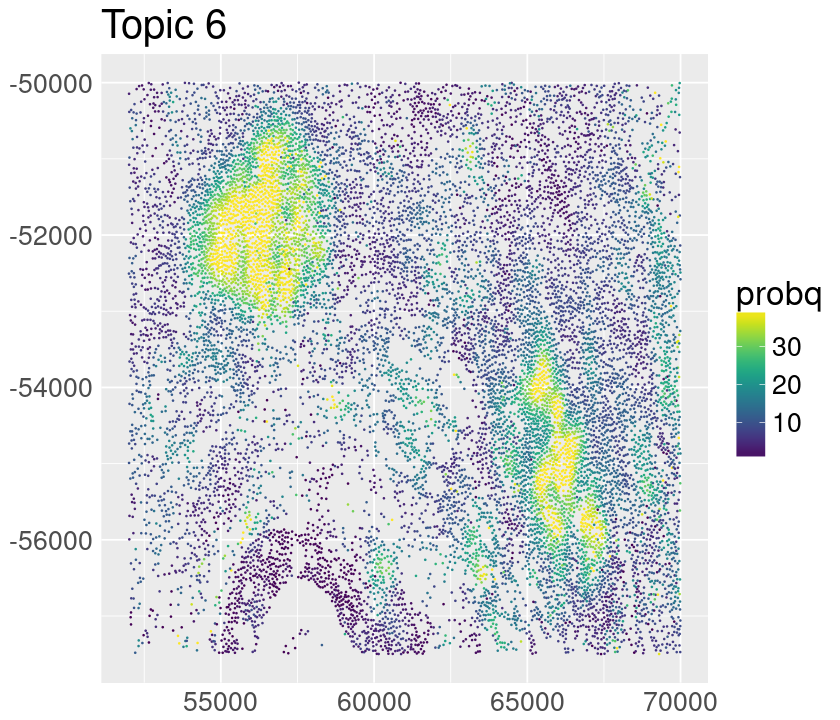

In [81]:
plotdat$probq = plotdat$prob
qmax = quantile(plotdat$probq, 0.95)
plotdat$probq[plotdat$prob > qmax] = qmax

options(repr.plot.width=7, repr.plot.height=6)
ggplot(plotdat, aes(x = loc.center_x, y = loc.center_y, col = probq))+
        geom_point(cex = 0.1)+
        #ggtitle("Celltype - subregion 3")+
        #guides(color = guide_legend(override.aes = list(size = 2)))+
        scale_color_viridis()+
        ggtitle(paste0("Topic ",topic))+
        theme(text = element_text(size = 20),
        # legend.position = "none", 
        #axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank()
        )
    

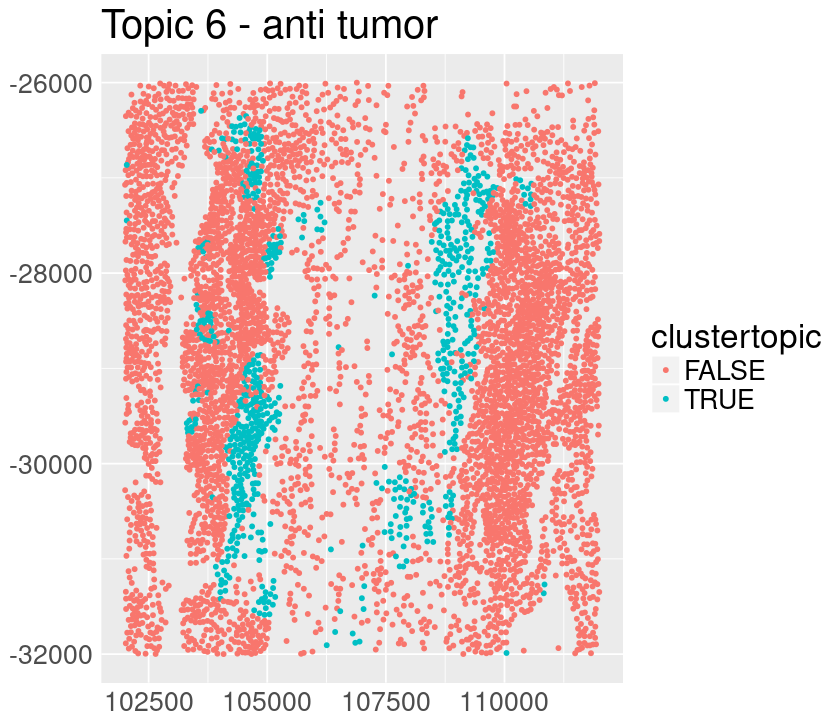

In [125]:
ggplot(plotdat, aes(x = loc.center_x, y = loc.center_y, col = clustertopic))+
        geom_point(cex = 1)+
        #ggtitle("Celltype - subregion 3")+
        #guides(color = guide_legend(override.aes = list(size = 2)))+
        #scale_color_viridis()+
        ggtitle(paste0("Topic ",topic, " - anti tumor"))+
        theme(text = element_text(size = 20),
        #legend.position = "none", 
        #axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank()
        )

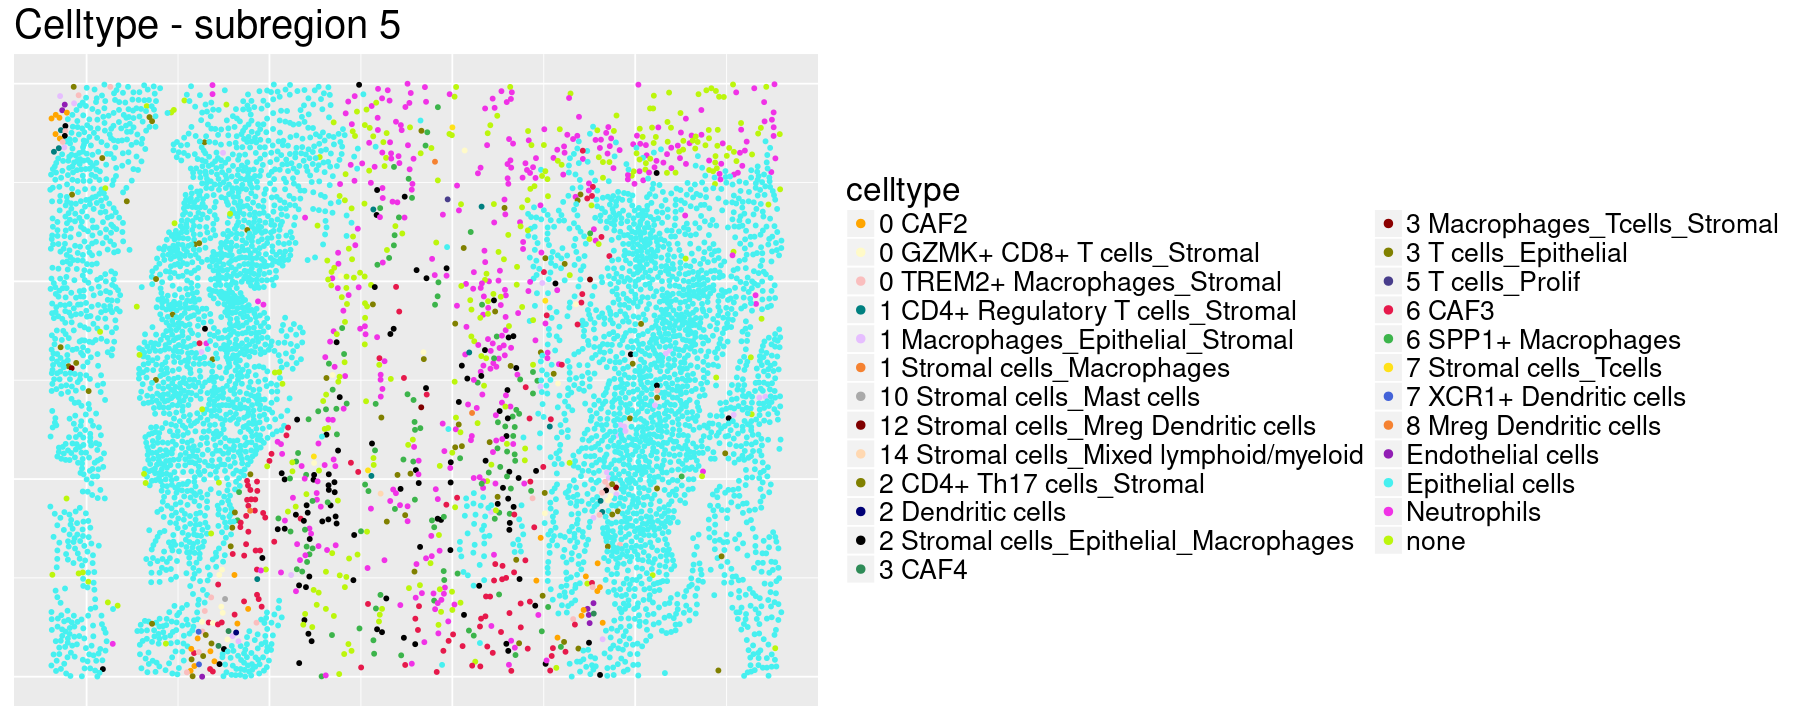

In [147]:
myCol = c('#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fffac8','#fabebe', '#008080', '#e6beff', "#f58231","#a9a9a9", '#800000','#ffd8b1', '#808000','#000075', '#000000', '#2e8b57', '#8b0000', '#808000','#483d8b','#8b008b')

plotdat$probq = plotdat$prob
qmax = quantile(plotdat$probq, 0.99)
plotdat$probq[plotdat$prob > qmax] = qmax

options(repr.plot.width=15, repr.plot.height=6)
ggplot(plotdat, aes(x = loc.center_x, y = loc.center_y, col = celltype))+
        geom_point(cex = 1)+
        ggtitle("Celltype - subregion 5")+
        guides(color = guide_legend(override.aes = list(size = 2)))+
        scale_color_manual(values=c("orange",myCol[c(10:24,1:9)]))+
        theme(text = element_text(size = 20),
        # legend.position = "none", 
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank()
        )

In [192]:
plotdat2 = dat
plotdat2$regions = "0"
plotdat2$regions[idx_sub1] = "1"
plotdat2$regions[idx_sub2] = "2"
plotdat2$regions[idx_sub3] = "3"

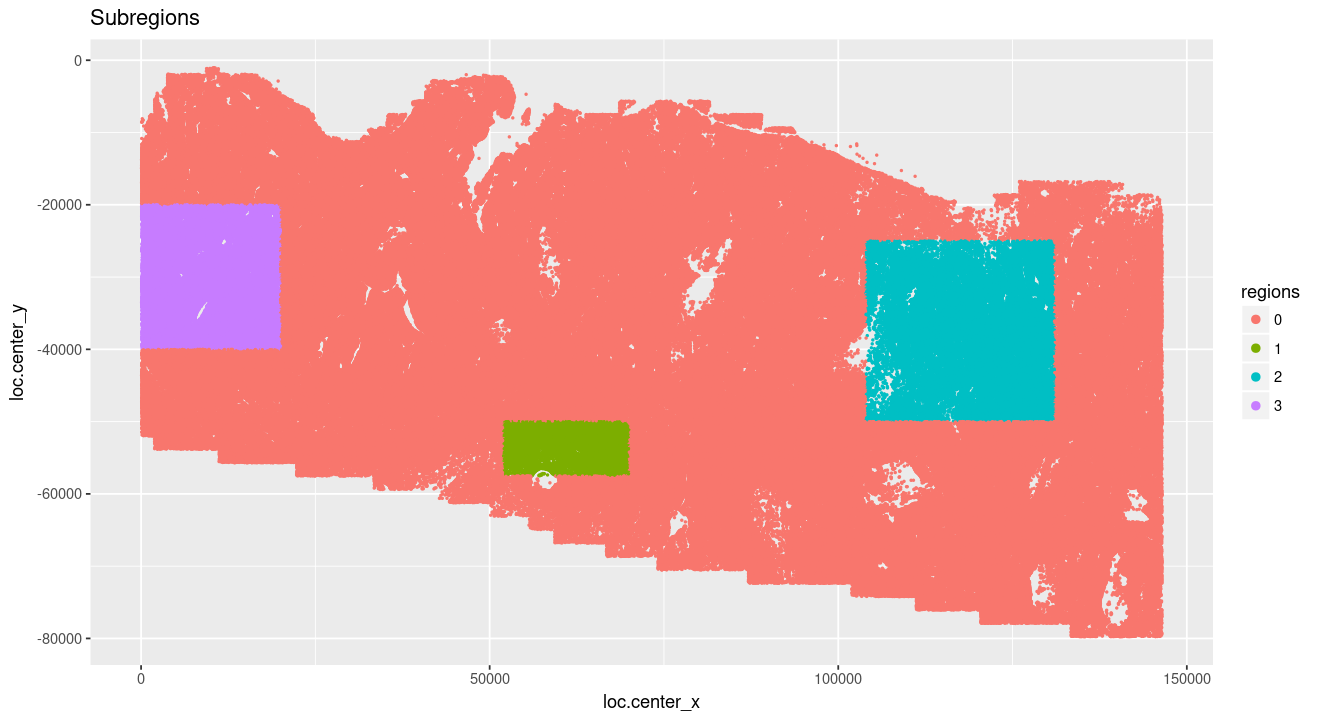

In [193]:
options(repr.plot.width=11, repr.plot.height=6)
ggplot(plotdat2, aes(x = loc.center_x, y = loc.center_y, col = regions))+
        geom_point(cex = 0.3)+
        guides(color = guide_legend(override.aes = list(size = 2)))+
        ggtitle("Subregions")

# Baysor dataset


In [1]:
library(ggplot2)
library(viridis)

Loading required package: viridisLite


In [2]:
path1 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/baysor_20231207/baysor_res_merged/segmentation_cell_stats.csv.gz'
metadata = read.csv(gzfile(path1))

location = cbind(metadata$x, metadata$y)
location1 = as.matrix(location)

idx1 = read.csv("data/cellidx_baysor1.csv")[,1]

location1 = location1[idx1,]

In [11]:
# get the genes
path1 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/baysor_20231207/baysor_res_merged/cell_by_gene.csv.gz'
count = read.csv(gzfile(path1))
count1 = as.matrix(count)
genes = colnames(count)

In [15]:
write.csv(count1_2, "sub1_CC_cell_by_gene.csv", row.names = F)

In [3]:
path1 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/baysor_20231207/20231212_public_singlecells_n16_baysor_geneformer_annos_kmeans15_nhoods_obs_only.csv'
celltype = read.csv(path1)

In [4]:
dat = data.frame(cellid = metadata$cell_id[idx1], x = location1[,1], y = -location1[,2])
rownames(dat) = dat$cellid
rownames(celltype) = celltype$cell_id

In [5]:
dat$celltype = celltype[as.character(dat$cellid),'cl46Mid']

In [6]:
idx_sub2 = which( dat$x > 104000 & dat$x < 131000  &  dat$y > -50000 & dat$y < -25000)
idx_sub4 = which( dat$x > 104000 & dat$x < 131000  &  dat$y > -50000 & dat$y < -25000)
idx_sub6 = which( dat$x > 125000 & dat$x < 135000  &  dat$y > -35000 & dat$y < -20000)
idx_sub1 = which( dat$x > 52000 & dat$x < 70000  &  dat$y > -57500 & dat$y < -50000)

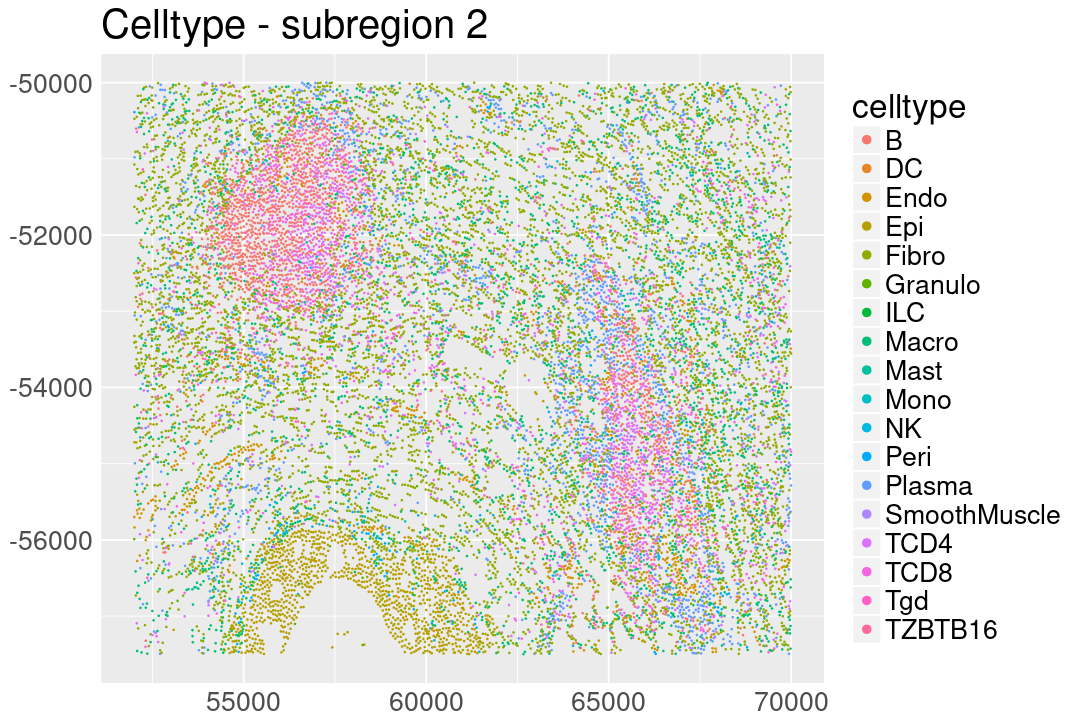

In [10]:
options(repr.plot.width=9, repr.plot.height=6)
ggplot(plotdat, aes(x = x, y = y, col = celltype))+
        geom_point(cex = 0.1)+
        ggtitle("Celltype - subregion 2")+
        guides(color = guide_legend(override.aes = list(size = 2)))+
        theme(text = element_text(size = 20),
        # legend.position = "none", 
        #axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank()
        )

In [11]:
load("modelssaved/three_sample_f20_s10K_l100_norm_baysor.RData")

In [12]:
norm_exp = out$exposures[1:sum(idx1),]/rowSums(out$exposures[1:sum(idx1),])

topic = 10

dat$prob = norm_exp[,topic]

In [13]:
plotdat = dat[idx_sub1,]

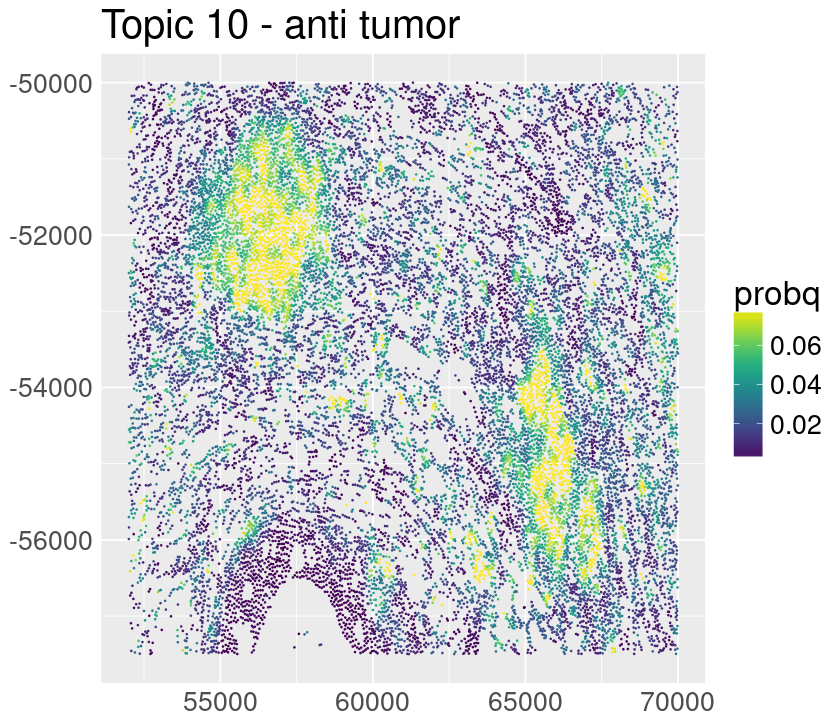

In [14]:
plotdat$probq = plotdat$prob
qmax = quantile(plotdat$probq, 0.95)
plotdat$probq[plotdat$prob > qmax] = qmax

options(repr.plot.width=7, repr.plot.height=6)
ggplot(plotdat, aes(x = x, y = y, col = probq))+
        geom_point(cex = 0.1)+
        #ggtitle("Celltype - subregion 2")+
        #guides(color = guide_legend(override.aes = list(size = 2)))+
        scale_color_viridis()+
        ggtitle(paste0("Topic ",topic, " - anti tumor"))+
        theme(text = element_text(size = 20),
        #legend.position = "none", 
        #axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank()
        )
    